In [1]:
from matplotlib.gridspec import GridSpec
from netCDF4 import Dataset
import matplotlib
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors
import matplotlib.colors as colors
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.colors import LogNorm
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import xarray as xr
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcols
import glob 
import colorcet as cc
import netCDF4
import cmaps
from scipy.interpolate import interp2d
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.gridspec as gridspec
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pyproj import Proj
# from wrf import getvar, interplevel, to_np, latlon_coords, get_cartopy, cartopy_xlim, cartopy_ylim
from colorspacious import cspace_converter
import pathlib
from pathlib import Path
import numpy.ma as ma
from numpy import genfromtxt
import pandas as pd
import calendar
from IPython.core.pylabtools import figsize
from scipy import stats
import sys
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os

## Objective
The objective of this notebook is to match the ARs that match Danny's data to the ones that match mine and then do the cummulative statistics

In [2]:
#first let's open the df for Danny's AR data
fewer_ARs = pd.read_csv('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/text_data/era5_matched_ar_events.csv')
fewer_ARs = fewer_ARs.drop(columns=['Unnamed: 0'])


In [3]:
fewer_ARs

,event_start_time,max_ivt,duration,area,max_prcp,centroid_lat_min,centroid_lat_max,validation_scale,event_filename,snow_no_snow
0,2014-11-03,939.812500,19,2.933710e+06,37.431418,37.516745,39.561999,1,2014_lptid00139.1000.nc,0
1,2014-11-05,904.690430,43,2.101863e+06,37.576498,36.974140,44.478376,2,2014_lptid00139.1000.nc,0
2,2014-11-21,1504.083984,13,3.758570e+06,75.277734,36.005787,37.594911,1,2014_lptid00159.1000.nc,1
3,2014-11-25,685.914795,19,3.123314e+06,75.277734,38.469532,41.099843,1,2014_lptid00159.1000.nc,0
4,2014-12-05,2071.340820,25,6.741418e+06,162.604144,22.585240,33.801482,1,2014_lptid00173.1000.nc,0
5,2014-12-08,1498.233887,103,3.809560e+06,162.604144,31.856551,37.589249,4,2014_lptid00173.1000.nc,0
6,2014-12-20,1465.936768,19,1.039961e+07,49.579952,26.924617,36.266095,1,2014_lptid00176.2000.nc,1
7,2015-01-05,953.609619,17,6.160660e+06,203.521068,33.684121,36.406547,1,2015_lptid00187.1000.nc,0
8,2015-01-15,1257.214111,25,3.437646e+06,98.498002,33.088624,35.171100,2,2015_lptid00193.1000.nc,1
9,2015-01-17,788.165039,31,2.333202e+06,98.498002,35.507404,39.694633,2,2015_lptid00193.1000.nc,0


In [5]:
#need to string split the event ID
fl_name=fewer_ARs['event_filename'].iloc[0]

In [17]:
#get the year
url=fewer_ARs['event_filename'].iloc[0]
NNNN=23
t_len = len(str(url))
hrrr=str(url)[t_len - NNNN:]
TT =4
# str(hrrr)[:TT]
yoi = str(hrrr)[:TT]
print(yoi)

2014


In [19]:
#get the file name
url=fewer_ARs['event_filename'].iloc[0]
NNNN=18
t_len = len(str(url))
hrrr=str(url)[t_len - NNNN:]
TT =15
# str(hrrr)[:TT]
fl_name = str(hrrr)[:TT]
print(fl_name)

lptid00139.1000


In [3]:
#create for loop to get the ARs we need
ar_fls = []
for i in range(0, len(fewer_ARs)):
    url=fewer_ARs['event_filename'].iloc[i]
    NNNN=23
    t_len = len(str(url))
    hrrr=str(url)[t_len - NNNN:]
    TT =4
    # str(hrrr)[:TT]
    yoi = str(hrrr)[:TT]

    url=fewer_ARs['event_filename'].iloc[i]
    NNNN=18
    t_len = len(str(url))
    hrrr=str(url)[t_len - NNNN:]
    TT =15
    # str(hrrr)[:TT]
    fl_name = str(hrrr)[:TT]
    

    ar_fls += ['/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/'+str(yoi)+'_'+str(fl_name)+'.nc']
    
len(ar_fls)

53

In [21]:
ar_fls

['/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2014_lptid00139.1000.nc',
 '/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2014_lptid00139.1000.nc',
 '/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2014_lptid00159.1000.nc',
 '/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2014_lptid00159.1000.nc',
 '/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2014_lptid00173.1000.nc',
 '/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2014_lptid00173.1000.nc',
 '/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2014_lptid00176.2000.nc',
 '/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2015_lptid00187.1000.nc',
 '/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2015_lptid00193.1000.nc',
 '/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2015_lptid00193.1000.nc',


## Just do the plotting for now!
Wait until Danny can give you the raw list, he matched from!

In [23]:
#the easiest way to do this is going to be to pull in all the ARs, and then go right to the min lat and then match on that to do the stats
fn_list = ar_fls

max_area = []
AR_ID = []
AR_DT = []

for i in fn_list:
    ar_test = xr.open_dataset(i)
    max_area += [ar_test['maxarea'].values]
    AR_ID += [i]
    AR_DT += [ar_test['time'][0].values]

# max_area = np.array(max_area)
max_area = np.concatenate(max_area)
print(len(max_area))

53


In [24]:
print(max_area.mean())
print(max_area.max())
print(max_area.min())
print(np.median(max_area))

6990557.297169811
15346521.0
1464522.375
6765481.0


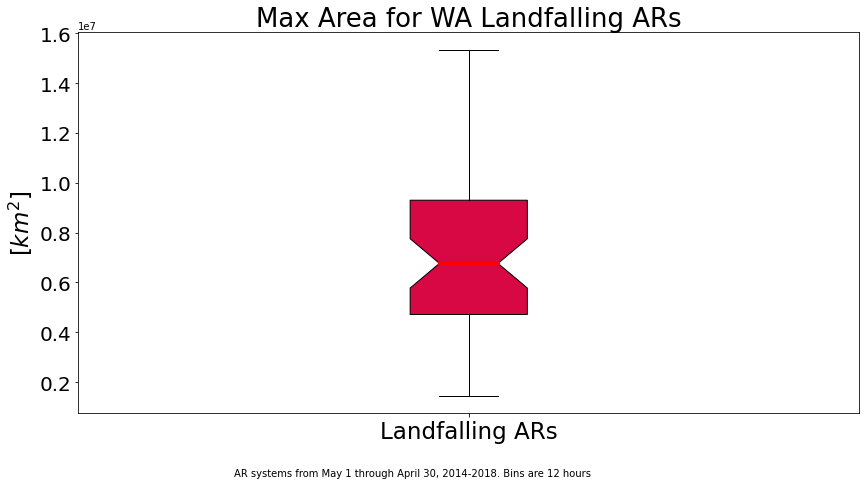

In [25]:
#plot the box plot
ticksize =20
legendsize=23
legbox = 19
titlesize = 26

fig, ax = plt.subplots(figsize=[14, 7])
data_area = [max_area]
type_labels = ['Landfalling ARs']

colors = ['#D70844']

bp=ax.boxplot(data_area, notch=True, patch_artist = True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)
    
ax.set_xticklabels(type_labels, fontsize = legendsize)
ax.set_title('Max Area for WA Landfalling ARs', fontsize=titlesize)
ax.set_ylabel('[$km^{2}$]', fontsize=legendsize)
plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 2014-2018. Bins are 12 hours', wrap=True)
fig.savefig("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Final_Proj_Plots/WA_LF_Max_Area_1hr.png", dpi=350, bbox_inches='tight')
plt.show()

In [26]:
#plot duration
WA_dur = []
for i in fn_list:
    ar_oi = xr.open_dataset(i)

    WA_dur += [ar_oi['duration'].values]
WA_dur = np.array(WA_dur)
WA_dur = np.concatenate(WA_dur)

In [27]:
np.median(WA_dur)

233.0

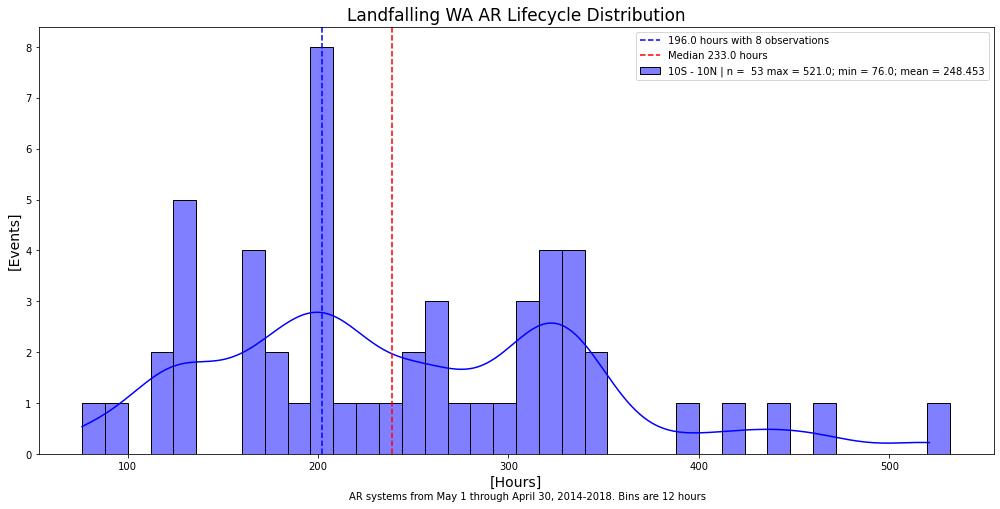

In [28]:
#plot the southern hemipshere

#plot the histograms
fig, ax = plt.subplots(figsize=[14, 7])
bwidths = 12

plt_1=sns.histplot(data=WA_dur, color="blue", label = '10S - 10N | n =  '+str(len(WA_dur))+ ' max = '+str(WA_dur.max())+'; min = '+str(WA_dur.min())+'; mean = '+str(np.around(WA_dur.mean(),3)), legend=True, ax=ax,binwidth=bwidths, kde=True, kde_kws={'clip':[48,1000],'bw_adjust':0.5})

box_ys_1=[h.get_height() for h in plt_1.patches]#give me the max value
box_xs_1 = [h.xy[0] for h in plt_1.patches] #gives the location of all of the values
ln_1=box_xs_1[box_ys_1.index(max(box_ys_1))]#gets the x value


ax.set_title('Landfalling WA AR Lifecycle Distribution', fontsize=17)
ax.set_xlabel('[Hours]', fontsize=14)
ax.set_ylabel('[Events]', fontsize=14)
# ax.set_xlim(48,600)
# ax.set_ylim(0,450)
ax.axvline(x=(ln_1+6), color='b', label=str(ln_1)+' hours with '+str(max(box_ys_1))+ ' observations', ls='--')
ax.axvline(x=(np.median(WA_dur)+6), color='r', label='Median '+str(np.median(WA_dur))+' hours', ls='--')

# plt.text(2, 0.65, r'$\cos(2 \pi t) \exp(-t)$')
ax.legend()

plt.tight_layout()
plt.figtext(0.35, 0, 'AR systems from May 1 through April 30, 2014-2018. Bins are 12 hours', wrap=True)
fig.savefig("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Final_Proj_Plots/WA_LF_Lifecycle_hist.png", dpi=350, bbox_inches='tight') 
plt.show()


In [29]:
start_ivt = []
for i in fn_list:
    ar_test = xr.open_dataset(i)

    ivt =  ar_test['max_running_field'].max().values
    start_ivt += [ivt]

start_ivt = np.array(start_ivt)

In [30]:
#need stats
print(start_ivt.mean())
print(start_ivt.max())
print(start_ivt.min())
print(np.median(start_ivt))

1439.3513506043632
3574.81494140625
732.01171875
1460.239990234375


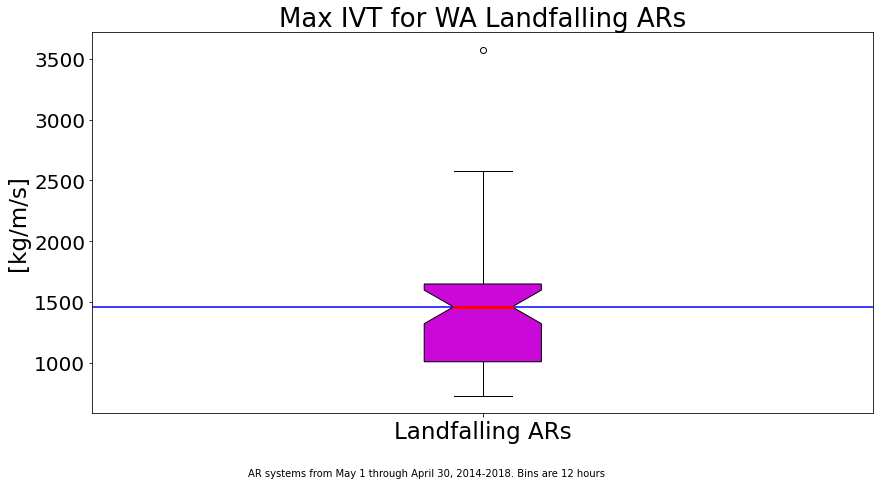

In [32]:
#plot the correct max real quick
#plot the box plot

ticksize =20
legendsize=23
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [start_ivt]
type_labels = ['Landfalling ARs']

colors = ['#CA08D7']

bp=ax.boxplot(data_area, notch=True, patch_artist = True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)


ax.set_xticklabels(type_labels, fontsize = legendsize)
plt.axhline(y = 1460, color = 'blue', linestyle = '-')
ax.set_title('Max IVT for WA Landfalling ARs', fontsize=titlesize)
ax.set_ylabel('[kg/m/s]', fontsize=legendsize)
plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 2014-2018. Bins are 12 hours', wrap=True)
fig.savefig("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Final_Proj_Plots/WA_LF_Max_IVT_1hr.png", dpi=350, bbox_inches='tight')
plt.show()

In [76]:
#let's do the rainfall
#for now, since it's just the max, the rainfall shouldn't truly matter if it's duplicated because it's hourly

fn_non_start_day_ls = sorted(glob.glob('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Rain_nc/Acc_24hr_AR_only/lptid*.nc'))

non_start_rain = []
for i in fn_non_start_day_ls:
    rain_oi = xr.open_dataset(i)
    rain_ary=rain_oi['One Day Rain'][0]
    rain_val=rain_ary.max().values
    non_start_rain += [rain_val]

non_start_rain = np.array(non_start_rain)
print(len(non_start_rain))

3345


In [77]:
#get the stats
print(non_start_rain.mean())
print(non_start_rain.max())
print(non_start_rain.min())
print(np.median(non_start_rain))

68.85135622258188
280.63763427734375
0.0
53.28768539428711


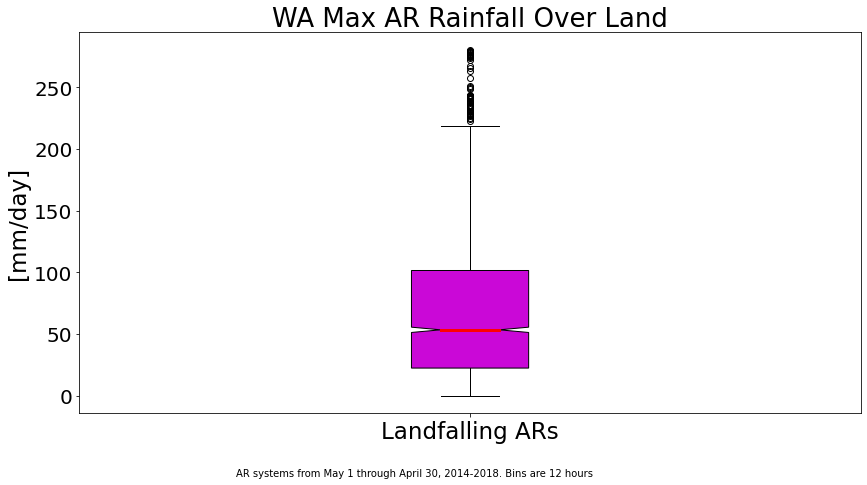

In [79]:
#plot the box plot

ticksize =20
legendsize=23
legbox = 19
titlesize = 26


fig, ax = plt.subplots(figsize=[14, 7])
data_area = [non_start_rain]
type_labels = ['Landfalling ARs']

colors = ['#CA08D7']

bp=ax.boxplot(data_area, notch=True, patch_artist = True)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
plt.yticks(fontsize=ticksize)
plt.xticks(fontsize=ticksize)


ax.set_xticklabels(type_labels, fontsize = legendsize)
# plt.axhline(y = 1495, color = 'blue', linestyle = '-')
ax.set_title('WA Max AR Rainfall Over Land', fontsize=titlesize)
ax.set_ylabel('[mm/day]', fontsize=legendsize)
plt.figtext(0.28, 0, 'AR systems from May 1 through April 30, 2014-2018. Bins are 12 hours', wrap=True)
fig.savefig("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Final_Proj_Plots/WA_LF_Max_Rain.png", dpi=350, bbox_inches='tight')
plt.show()

In [4]:
#read in the snotel data
snotel = xr.open_dataset('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/misc_data/data_snotel_wa_4000ft.nc')
snotel['lat']

<xarray.DataArray 'lat' (site: 14)>
array([47.30218, 47.37406, 45.98797, 46.19325, 47.0444 , 47.27427, 47.87224,
       48.8661 , 47.7637 , 47.74607, 47.20172, 48.57142, 46.23718, 46.27143])
Coordinates:
  * site     (site) object '911:WA:SNTL' '672:WA:SNTL' ... '591:WA:SNTL'

In [5]:
#need to use a loop and glob to bring in the AR rainfall data
fn_start_tot = []

for i in range(0, len(fewer_ARs)):
    url=fewer_ARs['event_filename'].iloc[i]
    NNNN=23
    t_len = len(str(url))
    hrrr=str(url)[t_len - NNNN:]
    TT =4
    # str(hrrr)[:TT]
    yoi = str(hrrr)[:TT]

    url=fewer_ARs['event_filename'].iloc[i]
    NNNN=18
    t_len = len(str(url))
    hrrr=str(url)[t_len - NNNN:]
    TT =15
    # str(hrrr)[:TT]
    fl_name = str(hrrr)[:TT]

    fn_start_1 = sorted(glob.glob('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Rain_nc/Acc_24hr_AR_only/'+str(fl_name)+'_'+str(yoi)+'*00.nc'))
    fn_start_2 = sorted(glob.glob('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Rain_nc/Acc_24hr_AR_only/'+str(fl_name)+'_'+str(yoi)+'*06.nc'))
    fn_start_3 = sorted(glob.glob('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Rain_nc/Acc_24hr_AR_only/'+str(fl_name)+'_'+str(yoi)+'*12.nc'))
    fn_start_4 = sorted(glob.glob('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Rain_nc/Acc_24hr_AR_only/'+str(fl_name)+'_'+str(yoi)+'*18.nc'))
    all_fns = fn_start_1 + fn_start_2 + fn_start_3 +fn_start_4
    fn_start_tot += [all_fns]
    


In [14]:
#flatten list
flat_list = []
for sublist in fn_start_tot:
  for element in sublist:
    flat_list.append(element)

In [8]:
len(fn_start_tot)

53

In [16]:
ar_masks = []
for i in flat_list:
    ar_oi = xr.open_dataset(i)
    ar_masks += [ar_oi['One Day Rain']]


rain_bulk=xr.concat(ar_masks, dim="time")
rain_start_mean=rain_bulk.mean(dim='time', skipna=True)

<ipython-input-17-9f59ec8b9f8b>:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


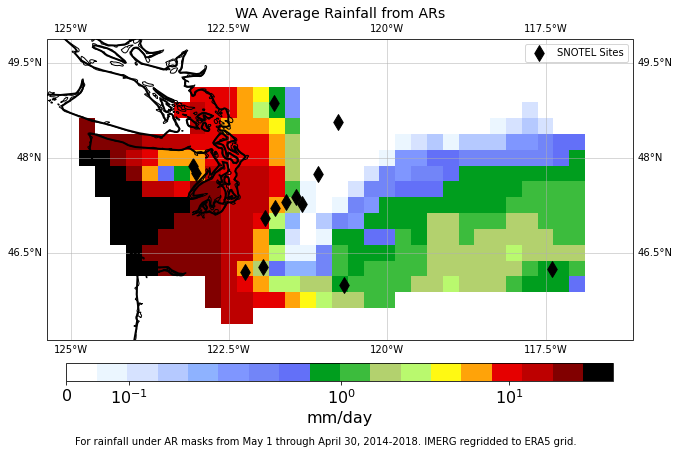

In [17]:
#plot the mean rainfall over WA for this period
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
#try plotting this out log scale
minv=0
maxv=rain_start_mean.max().values
colormap=cmaps.precip2_17lev
lthr = .3
trns = .7

plot_data = rain_start_mean
lon_ary = rain_start_mean['lon']
# lat_ary = IMERG_mask['lat'][::-1]# this works lol
lat_ary = rain_start_mean['lat']# this works lol


# colormap=cmaps.MPL_jet
fig = plt.figure(figsize=[14, 7])
political_boundaries = NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('WA Average Rainfall from ARs', fontsize=14)					   
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=10)
ax.coastlines('50m', linewidth=2, zorder=5)
# ax.set_extent([50, 180, -30, 30], crs=ccrs.PlateCarree())#set west coast in a second
css = ax.pcolormesh(lon_ary, lat_ary, plot_data.T, cmap = colormap, transform=ccrs.PlateCarree(),zorder=1,norm=colors.SymLogNorm(vmin=minv, vmax=maxv, linthresh=lthr)) #shut of min/max
ax.scatter(snotel['lon'], snotel['lat'], c='black', marker='d', s=125, transform=ccrs.PlateCarree(), label = 'SNOTEL Sites')
# ax.scatter(240.3, 34.416667, c='r', marker='x', s=100)
#css = ax.pcolormesh(lon_ary, lat_ary, plot_data, cmap = cmaps.precip2_17lev, transform=ccrs.PlateCarree(),zorder=1, vmin=7)
#cbar = plt.colorbar(css, ax=ax, extend='both', shrink=0.75)
#cbar = plt.colorbar(css, ax=ax,orientation='horizontal',extend='min',aspect=30, shrink=0.7, pad=0.06)
cbar = plt.colorbar(css, ax=ax,orientation='horizontal',aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('mm/day', fontsize =16)

#ax.text(20,-135,'Source= IMERG, Units=$mm$ $day^{-1}$', fontsize = 12, color = 'k')
plt.legend()
#try adding gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5)
gl.ypadding = 5
gl.xpadding = 5
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,2.5)[::1])
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,1.5)[::1])		
plt.figtext(0.25, 0.075, 'For rainfall under AR masks from May 1 through April 30, 2014-2018. IMERG regridded to ERA5 grid.', wrap=True)
fig.savefig("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Final_Proj_Plots/WA_non_start_mean_AR_rain.png", dpi=350, bbox_inches='tight') 
fig.show()

In [18]:
#for spatial dist
fl_names = glob.glob('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Space_dist_nc/Masks_WA_pt_*.nc')

ls_masks = []
for i in fl_names:
    ar_oi = xr.open_dataset(i)
    test1=np.array(ar_oi['Total_Mask'])
    ls_masks += [test1]

plt_sum=sum(ls_masks)

#I also need the coordinates
ar_oi = xr.open_dataset('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Space_dist_nc/Masks_WA_pt_1.nc')
lon_ary = ar_oi['lon']
lat_ary = ar_oi['lat']

<ipython-input-20-5d7c42aeb024>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


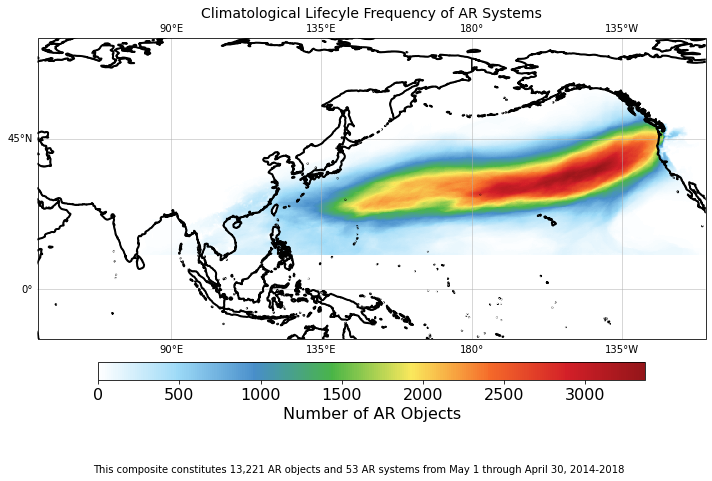

In [20]:
#let's plot the spatial distribution of our ARs in our data set


#plot and let's see
cm = 180
colormap=cmaps.WhiteBlueGreenYellowRed
fig = plt.figure(figsize=[14, 7])
political_boundaries = NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none')
states = NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cm))
ax.set_title('Climatological Lifecyle Frequency of AR Systems', fontsize=14)					   
ax.add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=10)
ax.coastlines('50m', linewidth=2, zorder=5)
minlon = 70 + cm
maxlon = -130 + cm

ax.set_extent([minlon, maxlon, -15, 75], ccrs.PlateCarree())
css = ax.pcolormesh(lon_ary, lat_ary, plt_sum, cmap = colormap, transform=ccrs.PlateCarree(),zorder=1, vmin=0)

cbar = plt.colorbar(css, ax=ax,orientation='horizontal',aspect=30, shrink=0.7, pad=0.06)
cbar.ax.tick_params(labelsize=16)
cbar.set_label('Number of AR Objects', fontsize =16)


#try adding gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5)
gl.ypadding = 5
gl.xpadding = 5
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,45)[::1])
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,45)[::1])
fig.text(0.50, 0.02,'This composite constitutes 13,221 AR objects and 53 AR systems from May 1 through April 30, 2014-2018', horizontalalignment='center', wrap=True )		
fig.savefig("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Final_Proj_Plots/AR_Space.png", dpi=350, bbox_inches='tight') 
fig.show()

In [110]:
#find the AR that has most of the rainfall in 2015 jan
ar_high_test = xr.open_dataset('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Project_AR_nc/2015_lptid00193.1000.nc')
ar_high_test

<xarray.Dataset>
Dimensions:                                 (lat: 721, lon: 1440, time: 314,
                                             n: 1)
Coordinates:
  * n                                       (n) int32 1
  * time                                    (time) datetime64[ns] 2015-01-05T...
  * lon                                     (lon) float32 0.0 0.25 ... 359.8
  * lat                                     (lat) float32 90.0 89.75 ... -90.0
Data variables: (12/29)
    grid_area                               (lat, lon) float32 ...
    centroid_lon                            (time) float64 ...
    centroid_lat                            (time) float64 ...
    area                                    (time) float64 ...
    largest_object_centroid_lon             (time) float64 ...
    largest_object_centroid_lat             (time) float64 ...
    ...                                      ...
    zonal_propagation_speed                 (n) float64 ...
    meridional_propagation_speed            (n) float64 ...
    mask_at_end_time                        (time, lat, lon) int8 ...
    mask_with_filter_at_end_time            (time, lat, lon) int8 ...
    mask_at_end_time_with_rain              (time, lat, lon) float32 ...
    mask_with_filter_at_end_time_with_rain  (time, lat, lon) float32 ...

In [125]:
#pull in all the rainfall times for this ar
rain_ls_tst_1 = sorted(glob.glob('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Rain_nc/Acc_24hr_AR_only/lptid00193.1000_20150117*.nc'))
rain_ls_tst_2 = sorted(glob.glob('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Rain_nc/Acc_24hr_AR_only/lptid00193.1000_20150118*.nc'))
rain_ls_tst = rain_ls_tst_1 + rain_ls_tst_2
len(rain_ls_tst)

21

In [122]:
#slice the rainfall time to make it work

start_ar = dt.datetime(2015,1,17,11)
end_ar = dt.datetime(2015,1,18,7)
TimeIndexer = 'time'
slice_ar = ar_high_test.sel(**{TimeIndexer: slice(start_ar, end_ar)})

In [130]:
str(slice_ar['time'][0].values)

'2015-01-17T11:00:00.000000000'

In [127]:
rain_start_mean.max().values

array(33.65609612)

In [135]:
#now let's set up to plot this nonsense
minv=0
maxv=75
# maxv = 28.79372092
colormap=cmaps.precip2_17lev
lthr = .3
trns = .7

for xxxxxxx in range(0,21):

        mask_ary = slice_ar['mask_at_end_time'][xxxxxxx]
        mask_lon = slice_ar['lon']
        mask_lat = slice_ar['lat']

        rain_to_plt = xr.open_dataset(rain_ls_tst[xxxxxxx])
        rain_plot_data = rain_to_plt['One Day Rain'][0]
        rain_lon_ary = rain_to_plt['lon']
        # lat_ary = IMERG_mask['lat'][::-1]# this works lol
        rain_lat_ary = rain_to_plt['lat']


        cm = 180
        figure, ax = plt.subplots(2,1,constrained_layout = True, figsize=[14, 14], subplot_kw={"projection": ccrs.PlateCarree(central_longitude=cm)})
        # figure, ax = plt.subplots(2)

        # cm = 180
        minlon = 70 + cm
        maxlon = -140 + cm
        colormap=cmaps.WhiteBlueGreenYellowRed

        political_boundaries = NaturalEarthFeature(category='cultural', name='admin_0_boundary_lines_land', scale='50m', facecolor='none')
        states = NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')
        # cbaxes1 = figure.add_axes([1.04, 0.9, 0.03, 0.8])
        # cbaxes2 = figure.add_axes([1.04, 0.9, 0.03, 0.3])

        cbaxes1 = inset_axes(
            ax[0],
            width="5%",  # width: 5% of parent_bbox width
            height="80%",  # height: 50%
            loc="center",
            bbox_to_anchor=(.6, 0., 1, 1),
            bbox_transform=ax[0].transAxes,
            borderpad=0,
        )

        cbaxes2 = inset_axes(
            ax[1],
            width="5%",  # width: 5% of parent_bbox width
            height="80%",  # height: 50%
            loc="center",
            bbox_to_anchor=(.6, 0., 1, 1),
            bbox_transform=ax[1].transAxes,
            borderpad=0,
        )

        ## Contour first
        # ax[0] = plt.axes(projection=ccrs.PlateCarree(central_longitude=cm))
        ax[0].set_title(str(slice_ar['time'][xxxxxxx].values), fontsize=20)					   
        ax[0].add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=10)
        ax[0].coastlines('50m', linewidth=2, zorder=5)
        ax[0].set_extent([minlon, maxlon, -15, 60], ccrs.PlateCarree())
        # ax.set_extent([50, 180, -50, 50], crs=ccrs.PlateCarree())#set west coast in a second
        # css = ax.pcolormesh(lon_ary, lat_ary, mask_ary, cmap = 'Greys', transform=ccrs.PlateCarree(),zorder=1, vmin=0, alpha=.5)
        # ax[0].contour(lon_ary, lat_ary, mask_ary, [0.5], cmap = 'Reds', transform=ccrs.PlateCarree(),zorder=3, vmin=0,linewidths=3)
        ax[0].contour(mask_lon, mask_lat, mask_ary, [0.5], colors=('magenta',), transform=ccrs.PlateCarree(),zorder=5, vmin=0,linewidths=3)
        css = ax[0].pcolormesh(rain_lon_ary, rain_lat_ary, rain_plot_data.T, cmap = colormap, transform=ccrs.PlateCarree(),zorder=1,norm=colors.SymLogNorm(vmin=minv, vmax=maxv, linthresh=lthr))
        # css = ax.pcolormesh(lon_ary2, lat_ary2, plot_data2, cmap = 'Reds', transform=ccrs.PlateCarree(),zorder=1, vmin=0, alpha=.5)
        # cbar = plt.colorbar(css, ax=ax[0],orientation='vertical',aspect=30, shrink=1, pad=0.06,cax = cbaxes1)
        cbar = plt.colorbar(css, ax=ax[0],orientation='vertical',aspect=30, shrink=1,cax = cbaxes1)
        cbar.ax.tick_params(labelsize=18)
        cbar.set_label('[mm/day]', fontsize =20)


        #try adding gridlines
        gl = ax[0].gridlines(draw_labels=True, linewidth=0.5)
        gl.ypadding = 5
        gl.xpadding = 5
        gl.xlocator = mticker.FixedLocator(np.arange(-180,180,45)[::1])
        gl.ylocator = mticker.FixedLocator(np.arange(-90,90,45)[::1])	

        ## rain second

        ax[1].add_feature(cartopy.feature.LAND, edgecolor='k', facecolor='none', zorder=10)
        ax[1].coastlines('50m', linewidth=2, zorder=5)
        ax[1].set_extent([-125, -115, 43, 52], ccrs.PlateCarree())
        # ax.set_extent([50, 180, -50, 50], crs=ccrs.PlateCarree())#set west coast in a second
        # css = ax.pcolormesh(lon_ary, lat_ary, mask_ary, cmap = 'Greys', transform=ccrs.PlateCarree(),zorder=1, vmin=0, alpha=.5)
        # ax[1].contour(lon_ary, lat_ary, mask_ary, [0.5], cmap = 'Reds', transform=ccrs.PlateCarree(),zorder=3, vmin=0,linewidths=3)
        ax[1].contour(mask_lon, mask_lat, mask_ary, [0.5], colors=('magenta',), transform=ccrs.PlateCarree(),zorder=5, vmin=0,linewidths=3)
        css = ax[1].pcolormesh(rain_lon_ary, rain_lat_ary, rain_plot_data.T, cmap = colormap, transform=ccrs.PlateCarree(),zorder=1,norm=colors.SymLogNorm(vmin=minv, vmax=maxv, linthresh=lthr))
        ax[1].scatter(snotel['lon'], snotel['lat'], c='black', marker='d', s=125, transform=ccrs.PlateCarree(), label = 'SNOTEL Sites')
        # css = ax.pcolormesh(lon_ary2, lat_ary2, plot_data2, cmap = 'Reds', transform=ccrs.PlateCarree(),zorder=1, vmin=0, alpha=.5)
        # cbar = plt.colorbar(css, ax=ax[1],orientation='vertical',aspect=30, shrink=1, pad=0.06,cax = cbaxes2)
        cbar = plt.colorbar(css, ax=ax[1],orientation='vertical',aspect=30, shrink=1,cax = cbaxes2)
        # cbar = plt.colorbar(css, ax=ax[1],orientation='vertical',aspect=30, shrink=1)
        cbar.ax.tick_params(labelsize=18)
        cbar.set_label('[mm/day]', fontsize =20)
        plt.legend()


        #try adding gridlines
        gl = ax[1].gridlines(draw_labels=True, linewidth=0.5)
        gl.ypadding = 5
        gl.xpadding = 5
        gl.xlocator = mticker.FixedLocator(np.arange(-180,180,45)[::1])
        gl.ylocator = mticker.FixedLocator(np.arange(-90,90,45)[::1])

        #final plotting logistics

        # plt.tight_layout()

        figure.savefig("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Final_Proj_Plots/animation_figs/image_"+str(xxxxxxx)+".png", dpi=350, bbox_inches='tight') 
        # plt.show()
        plt.close(figure)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:844: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/home/disk/orca/csmall3/anaconda3/envs/hyco_env/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:850: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:180: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. 

In [136]:
#create animation
import imageio
files_tpt = []

#let's pull absolute paths because this will make it easier
#let's just do all january 8th 2018 data
for filepath in pathlib.Path("/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Final_Proj_Plots/animation_figs/").glob('**/*'):  # loop recursively over all subdirectories
    files_tpt.append(str(filepath.absolute()))


# new_files_ls = sorted(files_tpt, key = last_14chars)  

new_files_ls = files_tpt

#build gif
# with imageio.get_writer('/home/disk/orca/csmall3/public_html/AR_Testing/TPW_Feb_March.gif', mode='I') as writer:
#     for i in range(0,len(files_tpt)):
#         file_tpt = new_files_ls[i]
#         image = imageio.imread(file_tpt)
#         writer.append_data(image)
    
#build mp4
with imageio.get_writer('/home/disk/orca/csmall3/HW_stuff/MLGeo_2023/Final_Project/Figures/Final_Proj_Plots/AR_LF_anim.mp4', fps=1) as writer:
    for i in range(0,len(files_tpt)):
        file_tpt = new_files_ls[i]
        image = imageio.imread(file_tpt)
        writer.append_data(image)


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (5878, 4754) to (5888, 4768) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
